# **Aula 02**

**Disciplina: Linguagens Formais**

**prof: Sérgio Assunção Monteiro, DSc**


**AFN** 
**biblioteca:** visual-automata

**url:** https://github.com/caleb531/automata

**url2:** https://pythonrepo.com/repo/lewiuberg-visual-automata

# **instalação de vários pacotes simultaneamente**

In [ ]:
pip install automata-lib pandas graphviz colormath visual-automata

     |████████████████████████████████| 8.5 MB 49.7 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
     |████████████████████████████████| 393 kB 54.8 MB/s 
     |████████████████████████████████| 428 kB 40.0 MB/s 
     |████████████████████████████████| 77 kB 7.3 MB/s 
     |████████████████████████████████| 52 kB 1.9 MB/s 
     |████████████████████████████████| 122 kB 45.6 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39408 sha256=556736fe7ef7be1751af4764b8f959540a196a024a9821e0b41348f65b2c3a19
  Stored in directory: /root/.cache/pip/wheels/1a/d7/a7/458a4632ccc8bfe436f5e9db9fef1aa84e5d243a1b4b4c7b59
  Created wheel for forbiddenfruit: filename=forbiddenfruit-0.1.4-py3-none-any.whl size=21810 sha256=ee705dcd2eff1b291f4d3eca42d3d36e5afc730b2cc8728cd694389c104a9979
  Stored in directory: /root/.cache/pip/wheels/ab/b1/d4/d71

# **Exemplo de AFN**

In [ ]:
from visual_automata.fa.nfa import VisualNFA

In [ ]:
nfa = VisualNFA(
    states={"q0", "q1", "q2"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": {"q2"}, "1": {"q1"}},
        "q1": {"1": {"q2"}, "0": {"q0", "q2"}},
        "q2": {},
    },
    initial_state="q0",
    final_states={"q0"},
)

In [ ]:
nfa.table

,0,1
→*q0,q2,q1
q1,"{*q0,q2}",q2
q2,∅,∅


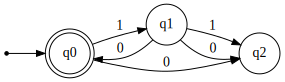

In [ ]:
nfa.show_diagram()

**Converter AFN para AFD**

In [ ]:
from automata.fa.nfa import NFA
from automata.fa.dfa import DFA


In [ ]:
nfa2 = NFA(
    states={"q0", "q1", "q2"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": {"q2"}, "1": {"q1"}},
        "q1": {"1": {"q2"}, "0": {"q0", "q2"}},
        "q2": {},
    },
    initial_state="q0",
    final_states={"q0"},
)

In [ ]:
dfa = DFA.from_nfa(nfa2)  # returns an equivalent NFA

In [ ]:
from visual_automata.fa.dfa import VisualDFA

In [ ]:
dfa2 = VisualDFA(dfa)

In [ ]:
dfa2.table

,0,1
{},{},{}
→*{q0},{q2},{q1}
"*{q0,q2}",{q2},{q1}
{q1},"*{q0,q2}",{q2}
{q2},{},{}


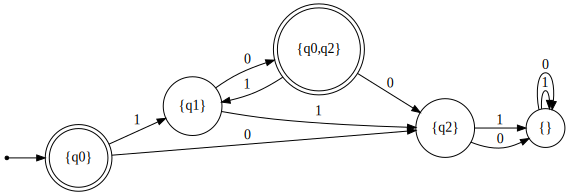

In [ ]:
dfa2.show_diagram()

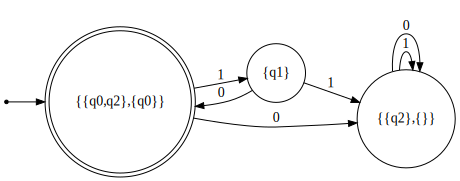

In [ ]:
minimal_dfa = VisualDFA.minify(dfa2)
minimal_dfa.show_diagram()